In [ ]:
import numpy as np 
import  matplotlib.pyplot as plt 
from utils import *



In [53]:
X_train, y_train, X_test, y_test = load_data()

In [73]:

print(X_test.shape)
print(y_test.shape)
print(np.unique(y_train, return_counts=True))

(200, 4096)
(200, 1)
(array([0., 1.]), array([500, 500]))


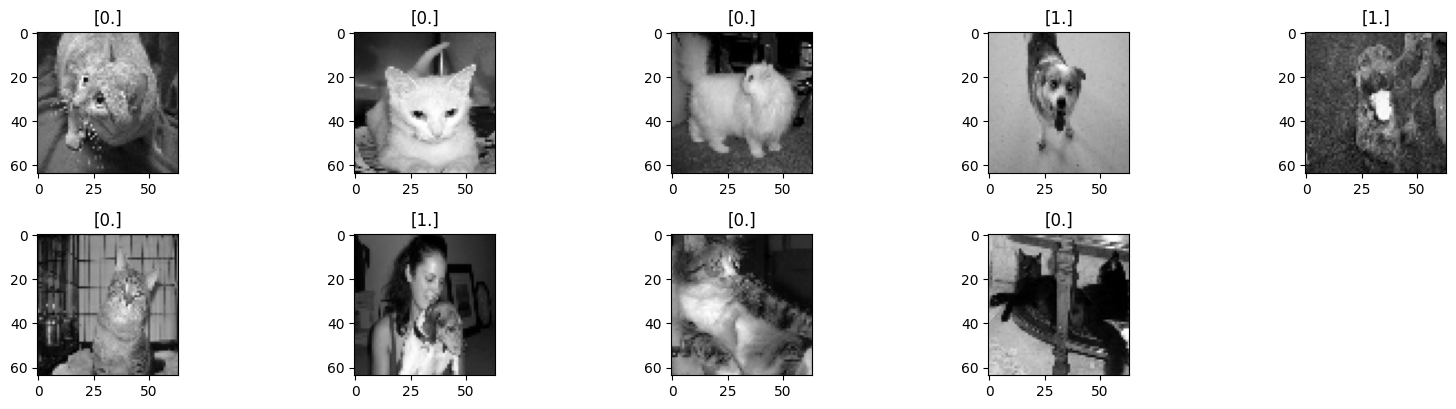

In [55]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [56]:
X_train = X_train.reshape((1000, -1)) / 255.0  # (1000, 4096) + Normalisation entre 0 et 1
X_test = X_test.reshape((200, -1)) / 255.0  # (200, 4096)


In [80]:
### Initialisation des poids ###

# Dimensions
input_size = 4096
hidden_size = 128
output_size = 1

# Initialisation aléatoire des poids
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01     # (4096, 64)
b1 = np.zeros((1, hidden_size))                          # (1, 64))
W2 = np.random.randn(hidden_size, output_size) * 0.01    # (64, 1)
b2 = np.zeros((1, output_size))                          # (1, 1)

In [58]:
### Fonctions d'activations ###

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)


In [ ]:
X_train.shape


(1000, 4096)

In [59]:
### Forward propagation ###

def forward(X):
    Z1 = X @ W1 + b1       # (1000, 64)
    A1 = relu(Z1)          # (1000, 64)
    Z2 = A1 @ W2 + b2      # (1000, 1)
    A2 = sigmoid(Z2)       # (1000, 1)
    return Z1, A1, Z2, A2


In [60]:
### Fonction de coût ###

def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8  # pour éviter log(0)
    loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    return loss


In [61]:
### Back propagation ###

def backward(X, y_true, Z1, A1, Z2, A2):
    m = X.shape[0]

    # Derivée de la loss par rapport à A2
    dZ2 = A2 - y_true.reshape(-1, 1)              # (1000, 1)
    dW2 = (A1.T @ dZ2) / m                        # (64, 1)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m # (1, 1)

    # Rétropropagation vers la couche cachée
    dA1 = dZ2 @ W2.T                              # (1000, 64)
    dZ1 = dA1 * relu_derivative(Z1)               # (1000, 64)
    dW1 = (X.T @ dZ1) / m                         # (4096, 64)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m # (1, 64)

    return dW1, db1, dW2, db2


In [62]:
### MAJ des poids ###

def update_params(learning_rate, dW1, db1, dW2, db2):
    global W1, b1, W2, b2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    

In [63]:
### Fonction d'entrainement ###

def train(X, y, epochs=100, learning_rate=0.01, print_every=10):
    for epoch in range(1, epochs + 1):
        # Forward propagation
        Z1, A1, Z2, A2 = forward(X)

        # Calcul de la perte
        loss = compute_loss(y, A2)

        # Backpropagation
        dW1, db1, dW2, db2 = backward(X, y, Z1, A1, Z2, A2)

        # Mise à jour des poids
        update_params(learning_rate, dW1, db1, dW2, db2)

        # Affichage périodique
        if epoch % print_every == 0 or epoch == 1:
            print(f"Epoch {epoch}, Loss = {loss:.4f}")


In [64]:
### Fonction de précicison ###

def accuracy(X, y):
    _, _, _, A2 = forward(X)
    predictions = (A2 > 0.5).astype(int).flatten()
    y_flat = y.flatten()

    print("Prédictions :", predictions[:10])
    print("Vraies étiquettes :", y_flat[:10])

    return np.mean(predictions == y_flat) * 100


In [82]:
### Entrainement ###

train(X_train, y_train, epochs=3000, learning_rate=0.01, print_every=300)
print("Train Accuracy:", accuracy(X_train, y_train))
print("Test Accuracy :", accuracy(X_test, y_test))


Epoch 1, Loss = 0.7872
Epoch 300, Loss = 0.5890
Epoch 600, Loss = 0.5430
Epoch 900, Loss = 0.5051
Epoch 1200, Loss = 0.4680
Epoch 1500, Loss = 0.4303
Epoch 1800, Loss = 0.3939
Epoch 2100, Loss = 0.3583
Epoch 2400, Loss = 0.3249
Epoch 2700, Loss = 0.2908
Epoch 3000, Loss = 0.2575
Prédictions : [0 0 0 0 1 1 0 1 0 0]
Vraies étiquettes : [0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
Train Accuracy: 89.7
Prédictions : [1 0 0 1 1 1 1 1 1 1]
Vraies étiquettes : [1. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
Test Accuracy : 53.0


In [81]:
### Autre initalisation ###

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))


dimension de X: (2, 100)
dimension de y: (1, 100)


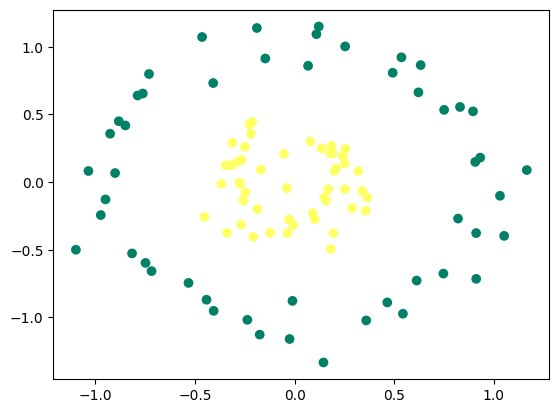

In [87]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimension de X:' , X.shape)
print('dimension de y:' , y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap= 'summer')
plt.show()